In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading azithromycin data
azm_data = pd.read_csv('../data/interim/azm_data.csv')
azm_data.head()

,Sample_ID,mic_azm,rs_azm,Year,Country,Continent,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,TACCGTAACCGGCAATGCGGATATTACGGTC,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,...,ACCGATGAGTTCGCCGGAATCGGTACGATTGAC,CTGCTGGACAAAAAAGGGATTAAAGATATCACC,CGTTCCTTTCGGCGTATTCTCGCCGTTGCGCGGCG,TCACATTTCCGCTTCAGACGGCATCCGATATGA,GAAGCTGCCACGCCGGCAGAAGTGTTGTTTGCGGG,ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG,ACTCGAATTTTGCAGGATTGGTATCAATGGCGATAATGCGACCGGCTTTGG,"ACCCGGCCCGGGCTGGCAGGCTACGGCTACACCGGTATCC,CACCTTAGGGAATCGTTCCCTTTGGGCCGGG,TACGCCGAAAGGAACGTGTATGCTGCCGCCC,GGGATTGTTGATTGTCGGACTGTTGTGCAACCTC",AGCCTGATTCACCAATGGTTTGTTCATAACAA,TTTTGAGCAGAAAGCAGTCAAAAACAGGGGGATTTTGCCCTTTTGACAGGTTCGAGTGCCG
0,ERR1549286,512.0,R,2015.0,UK,Europe,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,ERR1549290,512.0,R,2015.0,UK,Europe,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,ERR1549291,512.0,R,2015.0,UK,Europe,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,ERR1549287,512.0,R,2015.0,UK,Europe,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,ERR1549288,512.0,R,2015.0,UK,Europe,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [3]:
# Loading cip data
cip_data = pd.read_csv('../data/interim/cip_data.csv')
cip_data.head()

,Sample_ID,mic_cip,rs_cip,Year,Country,Continent,ACGTTTATGCCGTTATCGATCCGATAGCCGGT,CATCTGCACCCTGTCGGCACTCGCCGCCTGAACCACCCCGTCCGGACAAGG,"CACAAAACTCGTTTCCTGCTCCGAAATGGGCGA,GTAAGGGCTTTCTTAAATTTGATTAAAGGTCGTCTGAA,AACCGAAACCGACCGCGCCGTCGAATATCAGGCGGTCGCACCGGAAGTACG",AAATCTTCCGCTTTAATCCATTTGCCGTCCGA,...,CGCCTATGTGCTGCAACTTTTGGACACCGCGCTCGC,GGAATCAGGACGATAAACAAAATGCTGCCGGCGAG,CGCTACATAAGGAGAACCCTAAAATGCCGCA,ACATCCTGCCATCCGACAAGCGGCGGCAACCGCCAAAAAC,TCTTGGGCGCCGTTTGTGGGTTTGTTTATCGCGCG,AAGCAGCGCACGCTGTGAATCACATCTTTCGCC,ACCGCGCCGGACAGGGTGCGCGTAAACGGCAGTTG,AACGACAATACACACACCCTTCCCCCGCGCC,AAATTCATCAAAGAGCAAAGCGATTGGAAACCTCTGCCTGCTAATGCCGGTGAGTTGACCC,"GCCGCCTTGTCCTGATTTTTGTTAATCCGCCA,AACCATAAGTCGGCAACTTCGTAAACCAGGTGGGACGGGTCTTTGTCTTTGGATGC,AGAAGCTCGGAATCGTTCAGCAATACGCCTGCG"
0,SRR1661154,0.500,I,1996.0,Canada,America,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,SRR1661156,16.000,R,1997.0,Canada,America,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,SRR1661157,0.016,S,1998.0,Canada,America,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,SRR1661158,0.500,I,2000.0,Canada,America,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,SRR1661159,0.063,I,2001.0,Canada,America,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [4]:
# Loading cfx data
cfx_data = pd.read_csv('../data/interim/cfx_data.csv')
cfx_data.head()

,Sample_ID,mic_cfx,rs_cfx,Year,Country,Continent,ACCGGTCAGGGCGACGGGTTTGCGCCCTTTGAT,TGATACGGCGTGTAGGCGGTGTACCAGCCCGGG,CCGCACGGGGGAAATCCTCGCCTTGGCCAATACGCCCGCCTACGATCCCAACAG,GATATAACTGCGTCCGTCGGCATATTCGCCC,...,CATGTCTTTCGGTTATGGCCTGCAATTAAGC,GGCACGGTTGCGCCGCTGTTCGCTGTCTGCCCGGCCGGG,AAAACCGCCATCAGTTTTCCGCTCATCGGAGGA,TTGTTTTTCAAAGCTGACCGGCAACAATTCGCCGTCATGGGTCAAGACAGTATAGGCACG,TTGCCCGTAGTGACGATTTCTACGTTCAGGTTTGCTTCGATCGGAAATTGG,GTCGATGTTTTGAGGAACAAACTCGAACAGAAA,ACCGCCATCAGTTTTCCGCTCATCGGAGGAAGGG,"TCCCAACAGACCCGGCCGGGCAGACAGCGAACAG,GACGGTTTCTTTATTTGATTTGAACGGAAAAACCAT,CGTCAAAGACGCCAACGACGCCGGCACCAAAATCGACAC,CCATCAAAACCGCCATCAGTTTTCCGCTCATCGGA,CCAAGCCACGTCGGCATTCGGTTTCGAGCCGATGTCCA,TTCAGGCTGCCGCCCATAATTTTTTTGAAGGGC",GGAACGCCTGTCCGAGCTTGTCGATGTGCCGGT,CAGCGCATCGGTCATTGTCGGACTCGAGCCGCTGCTGATG
0,SRR1661154,0.125,I,1996.0,Canada,America,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,SRR1661156,0.063,I,1997.0,Canada,America,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,SRR1661157,0.063,I,1998.0,Canada,America,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,SRR1661158,0.250,R,2000.0,Canada,America,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,SRR1661159,0.001,S,2001.0,Canada,America,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [5]:
# add total unitigs column
azm_data['total_unitig_count'] = azm_data[azm_data.columns[6:]].sum(axis=1)
azm_data.head()

,Sample_ID,mic_azm,rs_azm,Year,Country,Continent,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,TACCGTAACCGGCAATGCGGATATTACGGTC,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,...,CTGCTGGACAAAAAAGGGATTAAAGATATCACC,CGTTCCTTTCGGCGTATTCTCGCCGTTGCGCGGCG,TCACATTTCCGCTTCAGACGGCATCCGATATGA,GAAGCTGCCACGCCGGCAGAAGTGTTGTTTGCGGG,ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG,ACTCGAATTTTGCAGGATTGGTATCAATGGCGATAATGCGACCGGCTTTGG,"ACCCGGCCCGGGCTGGCAGGCTACGGCTACACCGGTATCC,CACCTTAGGGAATCGTTCCCTTTGGGCCGGG,TACGCCGAAAGGAACGTGTATGCTGCCGCCC,GGGATTGTTGATTGTCGGACTGTTGTGCAACCTC",AGCCTGATTCACCAATGGTTTGTTCATAACAA,TTTTGAGCAGAAAGCAGTCAAAAACAGGGGGATTTTGCCCTTTTGACAGGTTCGAGTGCCG,total_unitig_count
0,ERR1549286,512.0,R,2015.0,UK,Europe,False,False,False,False,...,True,True,True,True,True,True,True,True,True,192
1,ERR1549290,512.0,R,2015.0,UK,Europe,False,False,False,False,...,True,True,True,True,True,True,True,True,True,193
2,ERR1549291,512.0,R,2015.0,UK,Europe,False,False,False,False,...,True,True,True,True,True,True,True,True,True,192
3,ERR1549287,512.0,R,2015.0,UK,Europe,False,False,False,False,...,True,True,True,True,True,True,True,True,True,192
4,ERR1549288,512.0,R,2015.0,UK,Europe,False,False,False,False,...,True,True,True,True,True,True,True,True,True,176


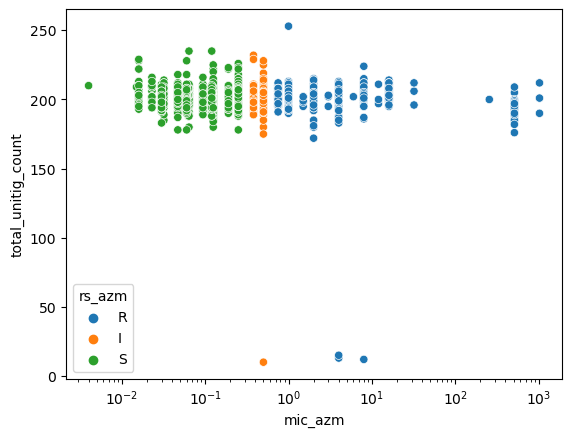

In [6]:
sir_order = ['R','I','S']
sns.scatterplot(x='mic_azm',y='total_unitig_count',data=azm_data,hue='rs_azm',hue_order=sir_order)
plt.xscale('log');

In [7]:
cip_data['total_unitig_count'] = cip_data[cip_data.columns[6:]].sum(axis=1)
cip_data.head()

,Sample_ID,mic_cip,rs_cip,Year,Country,Continent,ACGTTTATGCCGTTATCGATCCGATAGCCGGT,CATCTGCACCCTGTCGGCACTCGCCGCCTGAACCACCCCGTCCGGACAAGG,"CACAAAACTCGTTTCCTGCTCCGAAATGGGCGA,GTAAGGGCTTTCTTAAATTTGATTAAAGGTCGTCTGAA,AACCGAAACCGACCGCGCCGTCGAATATCAGGCGGTCGCACCGGAAGTACG",AAATCTTCCGCTTTAATCCATTTGCCGTCCGA,...,GGAATCAGGACGATAAACAAAATGCTGCCGGCGAG,CGCTACATAAGGAGAACCCTAAAATGCCGCA,ACATCCTGCCATCCGACAAGCGGCGGCAACCGCCAAAAAC,TCTTGGGCGCCGTTTGTGGGTTTGTTTATCGCGCG,AAGCAGCGCACGCTGTGAATCACATCTTTCGCC,ACCGCGCCGGACAGGGTGCGCGTAAACGGCAGTTG,AACGACAATACACACACCCTTCCCCCGCGCC,AAATTCATCAAAGAGCAAAGCGATTGGAAACCTCTGCCTGCTAATGCCGGTGAGTTGACCC,"GCCGCCTTGTCCTGATTTTTGTTAATCCGCCA,AACCATAAGTCGGCAACTTCGTAAACCAGGTGGGACGGGTCTTTGTCTTTGGATGC,AGAAGCTCGGAATCGTTCAGCAATACGCCTGCG",total_unitig_count
0,SRR1661154,0.500,I,1996.0,Canada,America,False,False,False,False,...,True,True,True,True,True,True,True,True,True,4471
1,SRR1661156,16.000,R,1997.0,Canada,America,False,False,False,False,...,True,True,True,True,True,True,True,True,True,4495
2,SRR1661157,0.016,S,1998.0,Canada,America,False,False,False,False,...,True,True,True,True,True,True,True,True,True,4398
3,SRR1661158,0.500,I,2000.0,Canada,America,False,False,False,False,...,True,True,True,True,True,True,True,True,True,4388
4,SRR1661159,0.063,I,2001.0,Canada,America,False,False,False,False,...,True,True,True,True,True,True,True,True,True,4369


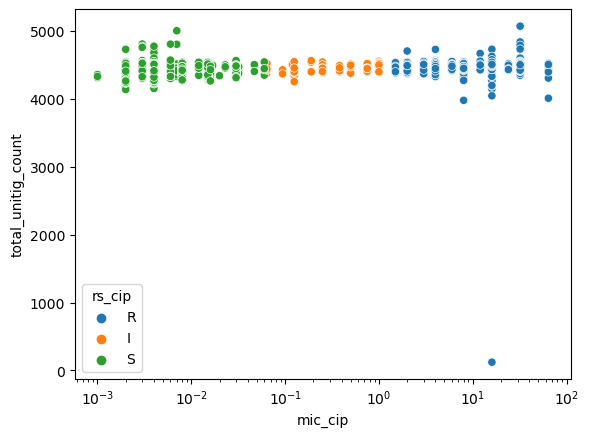

In [8]:
sns.scatterplot(x='mic_cip',y='total_unitig_count',data=cip_data,hue='rs_cip',hue_order=sir_order)
plt.xscale('log');

In [9]:
cfx_data['total_unitig_count'] = cfx_data[cfx_data.columns[6:]].sum(axis=1)
cfx_data.head()

,Sample_ID,mic_cfx,rs_cfx,Year,Country,Continent,ACCGGTCAGGGCGACGGGTTTGCGCCCTTTGAT,TGATACGGCGTGTAGGCGGTGTACCAGCCCGGG,CCGCACGGGGGAAATCCTCGCCTTGGCCAATACGCCCGCCTACGATCCCAACAG,GATATAACTGCGTCCGTCGGCATATTCGCCC,...,GGCACGGTTGCGCCGCTGTTCGCTGTCTGCCCGGCCGGG,AAAACCGCCATCAGTTTTCCGCTCATCGGAGGA,TTGTTTTTCAAAGCTGACCGGCAACAATTCGCCGTCATGGGTCAAGACAGTATAGGCACG,TTGCCCGTAGTGACGATTTCTACGTTCAGGTTTGCTTCGATCGGAAATTGG,GTCGATGTTTTGAGGAACAAACTCGAACAGAAA,ACCGCCATCAGTTTTCCGCTCATCGGAGGAAGGG,"TCCCAACAGACCCGGCCGGGCAGACAGCGAACAG,GACGGTTTCTTTATTTGATTTGAACGGAAAAACCAT,CGTCAAAGACGCCAACGACGCCGGCACCAAAATCGACAC,CCATCAAAACCGCCATCAGTTTTCCGCTCATCGGA,CCAAGCCACGTCGGCATTCGGTTTCGAGCCGATGTCCA,TTCAGGCTGCCGCCCATAATTTTTTTGAAGGGC",GGAACGCCTGTCCGAGCTTGTCGATGTGCCGGT,CAGCGCATCGGTCATTGTCGGACTCGAGCCGCTGCTGATG,total_unitig_count
0,SRR1661154,0.125,I,1996.0,Canada,America,False,False,False,False,...,True,True,True,True,True,True,True,True,True,170
1,SRR1661156,0.063,I,1997.0,Canada,America,False,False,False,False,...,True,True,True,True,True,True,True,True,True,167
2,SRR1661157,0.063,I,1998.0,Canada,America,False,False,False,False,...,True,True,True,True,True,True,True,True,True,169
3,SRR1661158,0.250,R,2000.0,Canada,America,False,False,False,False,...,True,True,True,True,True,True,True,True,True,167
4,SRR1661159,0.001,S,2001.0,Canada,America,False,False,False,False,...,True,True,True,True,True,True,True,True,True,156


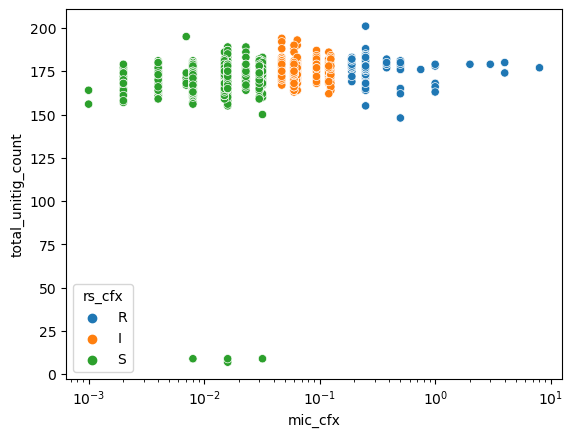

In [12]:
sns.scatterplot(x='mic_cfx',y='total_unitig_count',data=cfx_data,hue='rs_cfx',hue_order=sir_order)
plt.xscale('log');

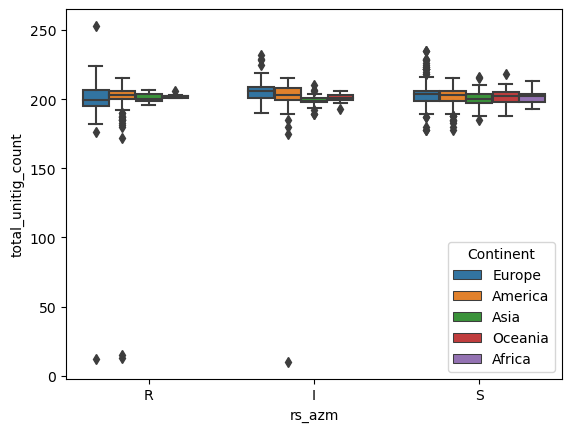

In [13]:
sns.boxplot(x='rs_azm',y='total_unitig_count',data=azm_data,hue='Continent');

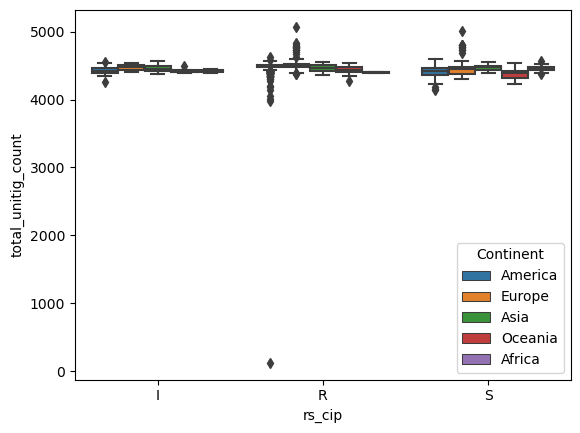

In [14]:
sns.boxplot(x='rs_cip',y='total_unitig_count',data=cip_data,hue='Continent');

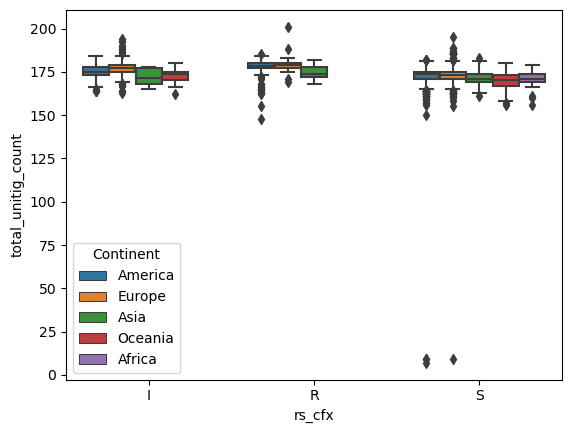

In [15]:
sns.boxplot(x='rs_cfx',y='total_unitig_count',data=cfx_data,hue='Continent');

Check samples per unitig.

In [24]:

azm_samples_per_unitig = azm_data[azm_data['Continent']=='Europe'][azm_data.columns[6:-2]].sum(axis=0)
azm_samples_per_unitig[azm_samples_per_unitig == 0].count()

108

In [36]:
azm_data[azm_data['Continent'].isnull()]

,Sample_ID,mic_azm,rs_azm,Year,Country,Continent,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,TACCGTAACCGGCAATGCGGATATTACGGTC,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,...,CTGCTGGACAAAAAAGGGATTAAAGATATCACC,CGTTCCTTTCGGCGTATTCTCGCCGTTGCGCGGCG,TCACATTTCCGCTTCAGACGGCATCCGATATGA,GAAGCTGCCACGCCGGCAGAAGTGTTGTTTGCGGG,ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG,ACTCGAATTTTGCAGGATTGGTATCAATGGCGATAATGCGACCGGCTTTGG,"ACCCGGCCCGGGCTGGCAGGCTACGGCTACACCGGTATCC,CACCTTAGGGAATCGTTCCCTTTGGGCCGGG,TACGCCGAAAGGAACGTGTATGCTGCCGCCC,GGGATTGTTGATTGTCGGACTGTTGTGCAACCTC",AGCCTGATTCACCAATGGTTTGTTCATAACAA,TTTTGAGCAGAAAGCAGTCAAAAACAGGGGGATTTTGCCCTTTTGACAGGTTCGAGTGCCG,total_unitig_count
155,SRR1661323,0.5,I,NaN,NaN,NaN,False,False,False,False,...,True,True,True,True,True,True,True,True,True,209


In [27]:
for continent in azm_data['Continent'].unique():
    samples_per_unitig = azm_data[azm_data['Continent']==continent][azm_data.columns[6:-2]].sum(axis=0)
    unused_unitig_count = samples_per_unitig[samples_per_unitig == 0].count()
    print(f"{continent}: {unused_unitig_count} unitigs not present.")

Europe: 108 unitigs not present.
America: 115 unitigs not present.
nan: 514 unitigs not present.
Asia: 189 unitigs not present.
Oceania: 188 unitigs not present.
Africa: 232 unitigs not present.


In [41]:
for continent in cip_data['Continent'].unique():
    samples_per_unitig = cip_data[cip_data['Continent']==continent][cip_data.columns[6:-2]].sum(axis=0)
    unused_unitig_count = samples_per_unitig[samples_per_unitig == 0].count()
    print(f"{continent}: {unused_unitig_count} unitigs not present.")

America: 1478 unitigs not present.
nan: 8872 unitigs not present.
Europe: 1313 unitigs not present.
Asia: 2421 unitigs not present.
Oceania: 2201 unitigs not present.
Africa: 2928 unitigs not present.


In [42]:
samples_per_unitig = cip_data[cip_data['Continent'].isin(['Europe','America'])][cip_data.columns[6:-2]].sum(axis=0)
unused_unitig_count = samples_per_unitig[samples_per_unitig == 0].count()
print(f"Europe and America: {unused_unitig_count} unitigs not present.")

Europe and America: 692 unitigs not present.


In [56]:
country_name = []
num_samples = []
num_unitigs = []
for country in cip_data['Country'].unique():
    
    total_samples = len(cip_data[cip_data['Country']==country])
    samples_per_unitig = cip_data[cip_data['Country']==country][cip_data.columns[6:-2]].sum(axis=0)
    unitig_count = samples_per_unitig[samples_per_unitig > 0].count()
    country_name.append(country)
    num_samples.append(total_samples)
    num_unitigs.append(unitig_count)
country_dict = {
    'country':country_name,
    'num_samples':num_samples,
    'num_unitigs':num_unitigs
}
country_df = pd.DataFrame(country_dict)
country_df

,country,num_samples,num_unitigs
0,Canada,164,6437
1,NaN,0,0
2,France,64,6181
3,Spain,129,6359
4,Italy,29,5768
...,...,...,...
57,Angola,1,4443
58,Guinea,1,4433
59,GuineaBissau,24,5547
60,Saudi_Arabia,1,4477


In [59]:
country_df[country_df['num_samples']>1].sort_values('num_unitigs')

,country,num_samples,num_unitigs
61,Ivory_Coast,2,4654
29,Jamaica,2,4857
54,CaboVerde,2,4877
31,Scotland,3,4885
49,HongKong,2,4898
53,Tanzania,2,4906
50,Malaysia,2,4910
18,Brasil,2,4916
43,Bhutan,7,4921
6,Hungary,2,4969
